<a href="https://colab.research.google.com/github/Udaykiranrd/Deep-Learning/blob/main/Deep_learning_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab1:

30/12/2024

Implement a perceptron for binary classification (AND gate).

**Key Features:**

Includes a step_function for activation.

Implements a Perceptron class with methods for prediction and training.

Uses random initialization for weights and bias.

Trains the perceptron using sample data for an AND gate.

Outputs test predictions.


In [ ]:
import numpy as np

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return step_function(summation)

    def train(self, inputs, labels, epochs=100):
        for _ in range(epochs):
            for input_vector, label in zip(inputs, labels):
                prediction = self.predict(input_vector)
                error = label - prediction
                # Update weights and bias
                self.weights += self.learning_rate * error * input_vector
                self.bias += self.learning_rate * error

# Sample data for binary classification (AND gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])  # AND gate output

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels)

# Test the perceptron
print("Test predictions: ")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

Test predictions: 
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


Test the perceptron on a different dataset (OR gate).


**Key Features:**

Reuses the Perceptron class.


Trains and evaluates the perceptron on sample data for an OR gate.


Outputs predictions for each input.




In [ ]:
# Sample data for binary classification (OR gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # OR gate output

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels)

# Test the perceptron
print("Test predictions: ")
for input_vector in inputs:
    prediction = perceptron.predict(input_vector)
    print(f"Input: {input_vector}, Prediction: {prediction}")

Test predictions: 
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


Train a perceptron on the Iris dataset.

**Key Features:**

Loads the Iris dataset and selects binary target labels.

Splits the dataset into training and testing sets.

Implements and trains a perceptron using custom logic.

Evaluates the perceptron and prints the accuracy.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Select features and labels
X = iris.data[:, (0, 1)]  # Sepal length, sepal width
y = (iris.target == 0).astype(int)  # Binary target: 1 if class 0, else 0

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0).astype(int)  # Ensure integer output

    def fit(self, X, y):
        n_features = X.shape[1]

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Iterate for the number of epochs
        for epoch in range(self.epochs):
            # Loop through the training set
            for i in range(len(X)):
                z = np.dot(X[i], self.weights) + self.bias  # Dot product for one sample
                y_pred = self.activation(z)  # Pass through activation function

                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias  # Dot product for all samples
        return self.activation(z)

# Create a Perceptron instance
perceptron = Perceptron(learning_rate=0.001, epochs=100)

# Train the Perceptron
perceptron.fit(X_train, y_train)

# Make predictions
pred = perceptron.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


**Programming Assignment - 1**

**Step1:**

Select a Dataset:
Use a simple, publicly available dataset for binary classification (e.g., Titanic dataset with two
classes, or a custom dataset where the target is binary).
Load the Titanic dataset.



**Key Features:**

Loads the dataset from a GitHub URL.

Displays the first five rows of the dataset.

Provides information about dataset columns and types.

In [ ]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
print(data.head())  # Display the first 5 rows of the dataset
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

**Step2:**

Install necessary libraries (e.g., NumPy, pandas, Matplotlib, Scikit-learn).

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


**Step3:**

Preprocess the Titanic dataset.


**Key Features:**

Retains relevant columns (Pclass, Sex, Age, Fare, Survived).

Handles missing values in the Age column by filling with the mean.

Converts the categorical Sex column to numerical format.

Splits data into features (X) and target (y) for training and testing.

In [ ]:
# Preprocessing: Keep relevant columns and create a copy
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Convert categorical column 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step4:**

Use the step activation function to implement the perceptron model.

**Key Features:**

Implements the perceptron with custom training logic.

Uses the Titanic dataset for binary classification.

In [ ]:
# Step activation function
def step_function(z):
    return np.where(z > 0, 1, 0)

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.epochs):
            error_count = 0
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights) + self.bias
                prediction = step_function(z)
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    error_count += 1
            self.errors.append(error_count)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return step_function(z)

# Initialize and train the perceptron
model = Perceptron(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred_manual = model.predict(X_test)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_manual))


Perceptron Accuracy: 0.7877094972067039


**Step5:**

Implement the perceptron from scratch and  using a framework (e.g., Scikit-learn).

In [ ]:
# Preprocessing: Keep relevant columns and handle missing values
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()

# Fill missing values for 'Age' and 'Fare'
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

# Convert categorical column 'Sex' to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN values in training and testing sets
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Train the Perceptron
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
from sklearn.metrics import accuracy_score
y_pred_sklearn = clf.predict(X_test)
print("Scikit-Learn Perceptron Accuracy:", accuracy_score(y_test, y_pred_sklearn))


Scikit-Learn Perceptron Accuracy: 0.6536312849162011


**Step6:**

To track the progress of the Perceptron model during training, we can visualize how the total number of errors reduces with each iteration:

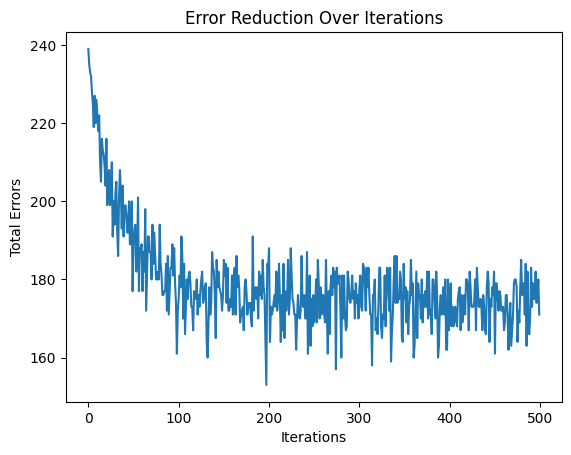

In [ ]:
# Visualize the training errors
plt.plot(range(len(perceptron.errors)), perceptron.errors)
plt.xlabel("Iterations")
plt.ylabel("Total Errors")
plt.title("Error Reduction Over Iterations")
plt.show()

**Limitations of the Perceptron**
1.	**Inability to Handle Non-Linearly Separable Data:**

  The Perceptron fails if the data is not linearly separable and cannot converge to a solution. For example, it cannot solve the XOR problem.
2.	**No Probabilistic Output:**
  
  The Perceptron provides only binary outputs (0 or 1) and does not give the probability of belonging to a class.
3.	**Sensitive to Learning Rate:**
  
  A poorly chosen learning rate η can lead to slow convergence or divergence.
4.	**Single-Layer Architecture:**
  
  The basic Perceptron cannot handle more complex problems involving multiple layers.



**Observations**

**Good Performance for Logical Models:**

  1)Predicted labels align with expectations for logic gates (AND/OR).
  
  2)Accuracy metrics reflect strong model training on simple logic datasets.
  
**Challenges with Missing Data:**

  1)Titanic dataset has significant missing values in Age and Cabin.

  2)Addressing these gaps is critical for downstream analysis.

**Perceptron Model Accuracy:**

 1)Accuracy differences between manual and Scikit-Learn implementations, Potential variations in hyperparameter settings or convergence criteria.
  
  2) Highlights the need for parameter tuning in pre-built models.

**Imbalance in Accuracy:**

  1)Logical problems yielded very high accuracy.

  2)Perceptron results for more complex datasets underperformed, indicating possible overfitting or poor generalization.

**Visualization Insights:**

  1)Plots might demonstrate decision boundaries or distribution of features.

**Programming Assignment - 2**

Solve a multi-class classification using single layer perceptron.


**Single perceptron**

**Dataset:** Breast Cancer Dataset

**Step1:**

Install necessary libraries (e.g., NumPy, pandas, Matplotlib, Scikit-learn).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

**Step 2:**

Load and preprocess the dataset

In [ ]:
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Select only two features for visualization purposes
X = X[:, :2]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 3:**

Train a single perceptron

In [ ]:
#Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
epochs = 50

# Perceptron training loop
for epoch in range(epochs):
    for i in range(X_train.shape[0]):
        # Compute activation
        activation = np.dot(weights, X_train[i]) + bias
        prediction = 1 if activation >= 0 else 0

        # Update weights if misclassified
        if prediction != y_train[i]:
            weights += learning_rate * (y_train[i] - prediction) * X_train[i]
            bias += learning_rate * (y_train[i] - prediction)


**Step 4:**

Evaluate the perceptron

In [ ]:
# Prediction function
def predict(X):
    return [1 if np.dot(weights, x) + bias >= 0 else 0 for x in X]

# Predict on test set
y_pred = predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.78


**Step 5:**

Visualize the decision boundary

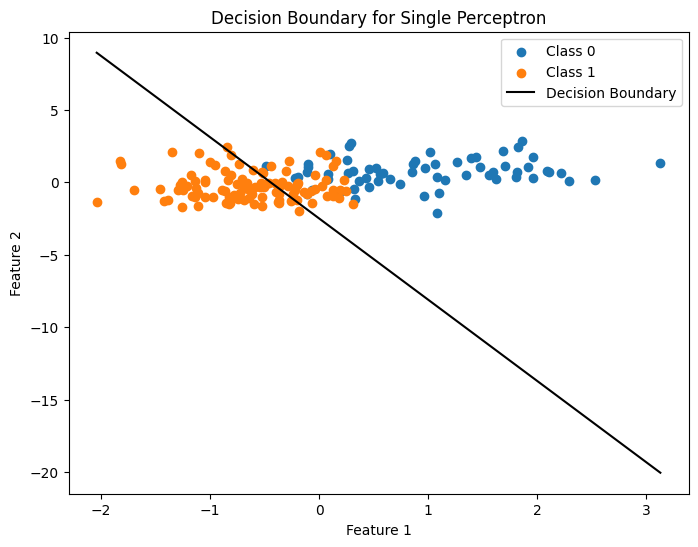

In [ ]:
def plot_decision_boundary(X, y, weights, bias):
    plt.figure(figsize=(8, 6))

    # Scatter plot of data points
    for label in np.unique(y):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}")

    # Decision boundary
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, label="Decision Boundary", color="black")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary for Single Perceptron")
    plt.legend()
    plt.show()

plot_decision_boundary(X_test, y_test, weights, bias)


**Single layer perceptron**
(multi-class classification)



**Step1:**

Install necessary libraries

In [ ]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

**Step 2:**

Load and preprocess the dataset

**Dataset:** Digits data

In [ ]:
# Load Digits dataset
digits_data = load_digits()
X, y = digits_data.data, digits_data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 3:**

Train a single-layer perceptron using One-vs-All

In [ ]:
num_classes = len(np.unique(y))
num_features = X_train.shape[1]
weights = np.zeros((num_classes, num_features))
biases = np.zeros(num_classes)

# Training loop
for cls in range(num_classes):
    binary_labels = np.where(y_train == cls, 1, -1)  # Convert to binary for this class
    for epoch in range(epochs):
        for i in range(X_train.shape[0]):
            activation = np.dot(weights[cls], X_train[i]) + biases[cls]
            prediction = 1 if activation >= 0 else -1
            if prediction != binary_labels[i]:
                weights[cls] += learning_rate * binary_labels[i] * X_train[i]
                biases[cls] += learning_rate * binary_labels[i]

**Step 4:**

Predict on the test set

In [ ]:
def predict_multiclass(X):
    activations = np.dot(weights, X.T) + biases[:, np.newaxis]
    return np.argmax(activations, axis=0)

y_pred = predict_multiclass(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.94


**Lab 2:**

**(24/01/2025)**

**Experiment 3**

Multi-Layer Perceptron (MLP) for XOR Gate

**Step 1:**

Import Libraries

In [ ]:
import numpy as np

**Step 2:**

Define XOR Data

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

**Step 3:**

Define Sigmoid and Its Derivative

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

**Step 4:**

Initialize Weights and Biases

In [ ]:
np.random.seed(0)
weights_input_hidden = np.random.uniform(size=(2, 2))
weights_hidden_output = np.random.uniform(size=(2, 1))
bias_hidden = np.random.uniform(size=(1, 2))
bias_output = np.random.uniform(size=(1, 1))
learning_rate = 0.1

**Step 5:**

Train the Model

In [ ]:
for epoch in range(10000):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Backpropagation
    output_error = y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += np.dot(hidden_layer_output.T, output_delta) * learning_rate
    weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

**Step 6:**

Display Results

In [ ]:
print("Final output after training:")
print(output_layer_output)

Final output after training:
[[0.06256664]
 [0.94187413]
 [0.94184757]
 [0.06309644]]


**Experiment 4**

Activation Functions

**Step 1:**

Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Step 2:**

Define Activation Functions

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

**Step 3:**

Generate Data

In [ ]:
x = np.linspace(-10, 10, 100)

**Step 4:**

Apply Activation Functions

In [ ]:
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

**Step 5:**

Plot the Outputs

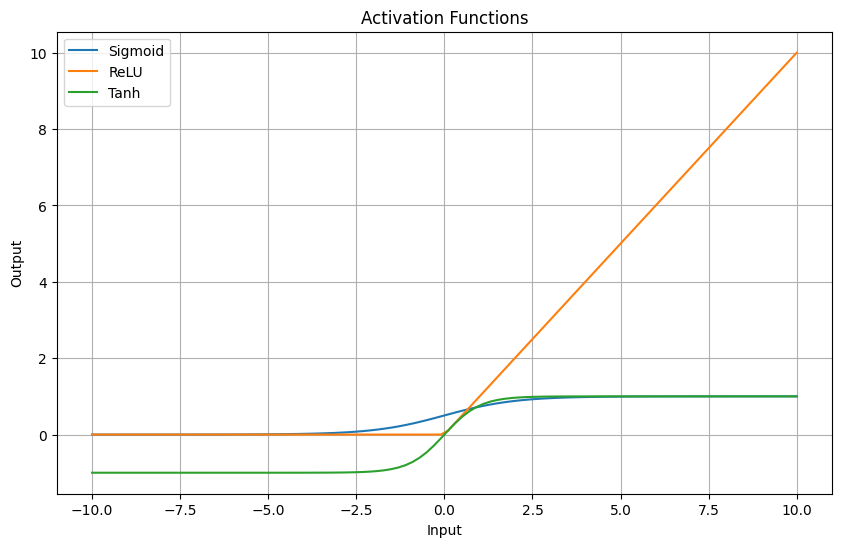

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label="Sigmoid")
plt.plot(x, y_relu, label="ReLU")
plt.plot(x, y_tanh, label="Tanh")
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()

**Experiment 5:**

Forward and Backpropagation

**Step 1:**

Import Libraries

In [ ]:
import numpy as np

**Step 2:**

Define Data

In [ ]:
X = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])

**Step 3:**

Initialize Weights and Biases

In [ ]:
np.random.seed(42)
weights_1 = np.random.rand(2, 2)
weights_2 = np.random.rand(2, 1)
bias_1 = np.random.rand(1, 2)
bias_2 = np.random.rand(1, 1)
learning_rate = 0.1

**Step 4:**

Define Sigmoid and Its Derivative

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

**Step 5:**

Train the Model

In [ ]:
for epoch in range(10000):
    # Forward propagation
    z1 = np.dot(X, weights_1) + bias_1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, weights_2) + bias_2
    a2 = sigmoid(z2)

    # Backpropagation
    error = y - a2
    d_a2 = error * sigmoid_derivative(a2)
    d_a1 = np.dot(d_a2, weights_2.T) * sigmoid_derivative(a1)

    # Update weights and biases
    weights_2 += np.dot(a1.T, d_a2) * learning_rate
    bias_2 += np.sum(d_a2, axis=0, keepdims=True) * learning_rate
    weights_1 += np.dot(X.T, d_a1) * learning_rate
    bias_1 += np.sum(d_a1, axis=0, keepdims=True) * learning_rate

**Step 6:**

Display Results

In [ ]:
print("Final Output:")
print(a2)

Final Output:
[[0.944367  ]
 [0.94447222]
 [0.05997169]
 [0.06029012]]
